# IBM Machine Learning
## Course 3: Supervised Learning: Regression
## Topic: Titanic

### 1. Introduction

This is the legendary competition in Machine learning. In this challenge, the participants were aske to build a predicitive model to predict who would survive using passenger data(ie name, age, gender, socio-economic class, etc).
The dataset can be found in kaggle: https://www.kaggle.com/c/titanic

### 2. Explorative Data Analysis

In [246]:
## import the library and dataset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")

#### The datatype of each column

In [247]:
## The size of training set and test set
print("The size of training samples is: ", train_df.shape)
print("The size of test samples is: ",test_df.shape)

The size of training samples is:  (891, 12)
The size of test samples is:  (418, 11)


In [248]:
## The column names
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [249]:
## Datatype of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As we can see above, there are missing value in four columns, Age, Fare, Cabin and Embark. For Embarked and Fare columns, there are only  one or two missing values. We can easily impute that. For Cabin column, there are a lot of missing value, we need to drop that column. For Age column, we will try to use KNN imputation method. 

### 3 Feature engineering

In [251]:
## Assign NA value to test dataset "Survived" columns
test_df['Survived']= np.nan

In [252]:
test_df.Survived

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [253]:
## row bind two dataset for feature engineering process
combine=train_df.append(test_df)

In [254]:
combine.index=range(combine.shape[0])

In [255]:
combine.index

RangeIndex(start=0, stop=1309, step=1)

In [256]:
## description of combined dataset
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 3.1 PassengerId column

In [257]:
combine.PassengerId

0          1
1          2
2          3
3          4
4          5
        ... 
1304    1305
1305    1306
1306    1307
1307    1308
1308    1309
Name: PassengerId, Length: 1309, dtype: int64

The passenger ID cannot be used for prediction. We can safely drop the column.

In [258]:
combine=combine.drop('PassengerId', axis=1)

#### 3.2 Pclass column

In [259]:
combine.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

This column is good as predictor

#### 3.3 Name 

In [260]:
combine.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

We can extract the title from the Name column.

In [261]:
combine['Title']=combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [262]:
combine.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Dona          1
Don           1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Countess      1
Name: Title, dtype: int64

In [263]:
## Some title have different variant like Miss, Ms, Mlle. We need to standardize these title
combine['Title']=combine['Title'].replace('Mlle', 'Miss')
combine['Title']=combine['Title'].replace('Ms', 'Miss')
combine['Title']=combine['Title'].replace('Mme', 'Mrs')

In [264]:
## select the titles that are less frequent to combine
rare_titles=combine.groupby('Title').filter(lambda x: len(x)<10).Title.unique().tolist()

In [265]:
## Replace the raretitle
combine['Title']=combine['Title'].replace(rare_titles, 'Rare')

In [266]:
## double chekc the title after process
combine.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [267]:
## Drop name column
combine=combine.drop('Name', axis=1)

#### 3.4&5 Sex and Age

In [268]:
## The raito of different gender
combine.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [269]:
## The ratio of missing value in Age
combine.Age.isna().value_counts(normalize=True)

False    0.799083
True     0.200917
Name: Age, dtype: float64

There is about 20% missing value in Age column. we should come back to address this later

#### 3.6&7 Parch and SibSp

In [270]:
## Distribution of parent & children number 
combine.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [271]:
## Distribution of sibling and spouse number 
combine.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [272]:
## We will create a new column called family size 
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1

In [273]:
combine.FamilySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [274]:
## Drop two columns after new column is created
combine=combine.drop(['SibSp','Parch'], axis=1)

#### 3.8 Ticket

In [275]:
len(combine.Ticket.unique())

929

Same as PassengerId, there are too many levels for Ticket column. It's not good for prediction. We may drop this column.

In [276]:
combine=combine.drop('Ticket', axis=1)

#### 3.9 Fare

In [277]:
## Fare is the float data. We can check the distribution 
combine.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [278]:
np.where(combine.Fare.isna())[0][0]

1043

In [279]:
## Use the mean value to impute the missing value for Fare
combine.Fare[[1043]]=np.mean(combine.Fare)

In [280]:
combine.Fare[[1043]]

1043    33.295479
Name: Fare, dtype: float64

#### 3.10 Cabin

In [281]:
## The ratio of missing value in Cabin column
combine.Cabin.isna().value_counts(normalize=True)

True     0.774637
False    0.225363
Name: Cabin, dtype: float64

As mentioned, there are too many missing value in this column. We will drop this column.

In [282]:
combine=combine.drop('Cabin',axis=1)

#### 3.11 Embarked

In [283]:
combine.Embarked.value_counts(sort=True)

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [284]:
combine.Embarked.isna().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [285]:
np.where(combine.Embarked.isna())

(array([ 61, 829], dtype=int64),)

In [286]:
## Use the most frequent value to impute
combine.Embarked[61]=combine.Embarked.value_counts(sort=True).index[0]
combine.Embarked[829]=combine.Embarked.value_counts(sort=True).index[0]

#### Age imputation

In [287]:
## check the value for each column
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   object 
 3   Age         1046 non-null   float64
 4   Fare        1309 non-null   float64
 5   Embarked    1309 non-null   object 
 6   Title       1309 non-null   object 
 7   FamilySize  1309 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 81.9+ KB


In [288]:
combine.Age=combine.groupby(['Sex', 'Pclass', 'Embarked', 'Title'])['Age'].apply(lambda x:x.fillna(x.median()))

In [289]:
## check the value for each column
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   object 
 3   Age         1309 non-null   float64
 4   Fare        1309 non-null   float64
 5   Embarked    1309 non-null   object 
 6   Title       1309 non-null   object 
 7   FamilySize  1309 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 81.9+ KB


#### Encode

In [290]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

combine['Sex']=le.fit_transform(combine.Sex)
combine['Sex'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int32

In [291]:
combine['Embarked']=le.fit_transform(combine.Embarked)
combine['Title']=le.fit_transform(combine.Title)

### 4. Model Building

#### 4.1 Data split

In [292]:
## Create train, test and score set
## the score set will be the result we submit to kaggle

In [293]:
X_score=combine.iloc[train_df.shape[0]:,1:8]
X_score.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
891,3,1,34.5,7.8292,1,2,1
892,3,0,47.0,7.0000,2,3,2
893,2,1,62.0,9.6875,1,2,1
894,3,1,27.0,8.6625,2,2,1
895,3,0,22.0,12.2875,2,3,3


In [294]:
X=combine.iloc[:train_df.shape[0],1:8]
y=combine.Survived[:train_df.shape[0]]

In [295]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,22.0,7.2500,2,2,2
1,1,0,38.0,71.2833,0,3,2
2,3,0,26.0,7.9250,2,1,1
3,1,0,35.0,53.1000,2,3,2
4,3,1,35.0,8.0500,2,2,1


In [296]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts 
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(X, y))

In [297]:
X_train = X.loc[train_idx, :]
y_train = y[train_idx]

X_test = X.loc[test_idx, :]
y_test = y[test_idx]

In [298]:
y_train.value_counts(normalize=True).sort_index()

0.0    0.616372
1.0    0.383628
Name: Survived, dtype: float64

In [299]:
y_test.value_counts(normalize=True).sort_index()
### END SOLUTION

0.0    0.615672
1.0    0.384328
Name: Survived, dtype: float64

#### 4.2 Logistic Regression

In [300]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [301]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [302]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

In [303]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)


In [304]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [305]:
metrics

,lr,l1,l2
precision,0.793309,0.797838,0.797838
recall,0.794776,0.798507,0.798507
fscore,0.793755,0.798127,0.798127
accuracy,0.794776,0.798507,0.798507
auc,0.778611,0.785290,0.785290


#### 4.3 Build Decision Tree

In [306]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

dt.tree_.node_count, dt.tree_.max_depth

(303, 21)

In [307]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      623 non-null    int64  
 1   Sex         623 non-null    int32  
 2   Age         623 non-null    float64
 3   Fare        623 non-null    float64
 4   Embarked    623 non-null    int32  
 5   Title       623 non-null    int32  
 6   FamilySize  623 non-null    int64  
dtypes: float64(2), int32(3), int64(2)
memory usage: 31.6 KB


In [308]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [309]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.982343,0.768657
precision,0.995652,0.730337
recall,0.958159,0.631068
f1,0.976546,0.677083


Use Grid search with cross validation

In [310]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [311]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(103, 7)

In [312]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [313]:
train_test_gr_error

,train,test
accuracy,0.879615,0.761194
precision,0.922680,0.753247
recall,0.748954,0.563107
f1,0.826790,0.644444


#### 4.4 Bagging

In [314]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.213483
20.0,0.211878
30.0,0.200642
40.0,0.200642
50.0,0.202247
100.0,0.192616
150.0,0.194222
200.0,0.191011
300.0,0.189406


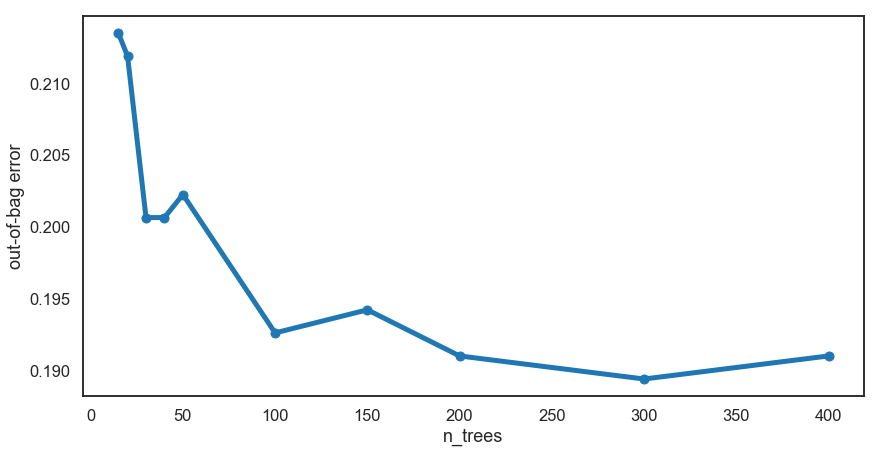

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

#### 4.5 Extra Tree

In [316]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.200642
20.0,0.195827
30.0,0.192616
40.0,0.192616
50.0,0.199037
100.0,0.191011
150.0,0.200642
200.0,0.186196
300.0,0.197432


In [317]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.213483,0.200642
20.0,0.211878,0.195827
30.0,0.200642,0.192616
40.0,0.200642,0.192616
50.0,0.202247,0.199037
100.0,0.192616,0.191011
150.0,0.194222,0.200642
200.0,0.191011,0.186196
300.0,0.189406,0.197432


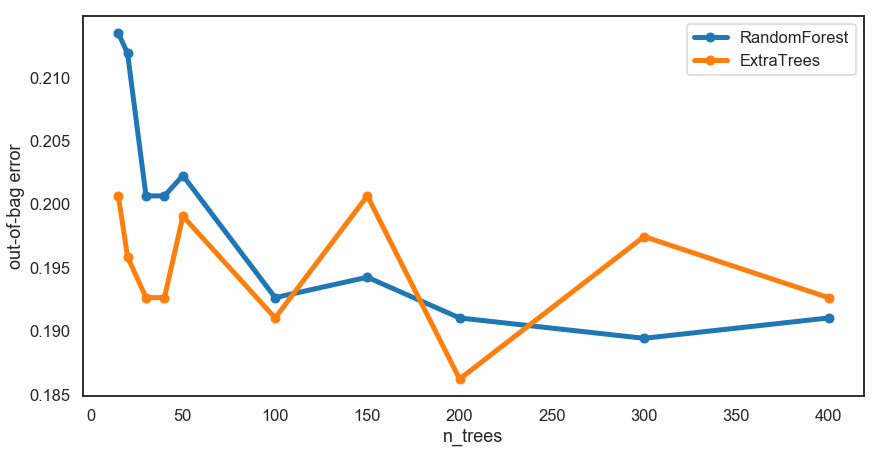

In [318]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [319]:
# Random forest with 300 estimators
model = RF.set_params(n_estimators=300)

y_pred = model.predict(X_test)

In [320]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       165
         1.0       0.77      0.70      0.73       103

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

   accuracy  precision    recall        f1       auc
0  0.802239   0.765957  0.699029  0.730964  0.782848


#### 4.6 Boosting

In [321]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = np.linspace(5, 105, num=11, dtype=int)
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 5 trees
Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 35 trees
Fitting model with 45 trees
Fitting model with 55 trees
Fitting model with 65 trees
Fitting model with 75 trees
Fitting model with 85 trees
Fitting model with 95 trees
Fitting model with 105 trees


,error
n_trees,
5.0,0.205224
15.0,0.186567
25.0,0.186567
35.0,0.182836
45.0,0.186567
55.0,0.190299
65.0,0.190299
75.0,0.194030
85.0,0.194030


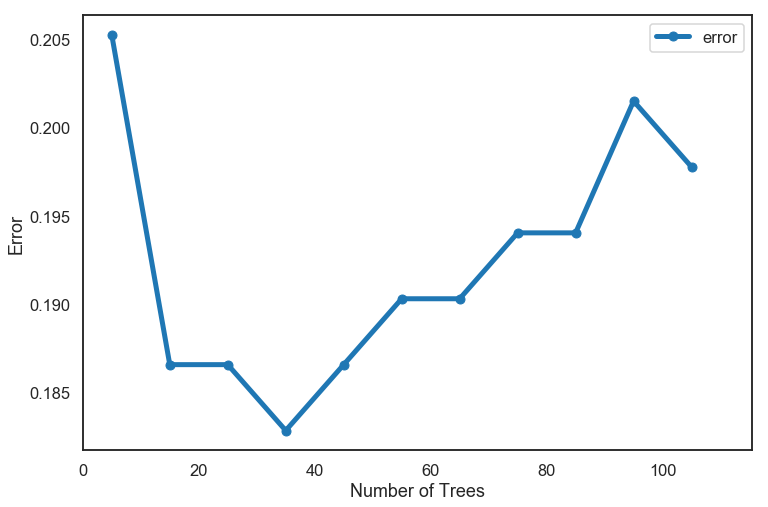

In [322]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

Grid Search with cross-validation

In [323]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [324]:
GV_GBC.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [325]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       173
         1.0       0.75      0.81      0.78        95

   micro avg       0.84      0.84      0.84       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.84      0.84       268



#### 4.7 Adaboost

In [326]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [327]:
GV_ABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=100, random_state=None)

In [328]:
y_pred = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       171
         1.0       0.68      0.72      0.70        97

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



#### 4.8 Voting Classifier

In [329]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', lr_l2),('Random Forest', model),('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

In [330]:
y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       165
         1.0       0.82      0.69      0.75       103

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [331]:
Survived=VC.predict(X_score).astype(int)
PassengerID=range(892,1310)

In [332]:
len(PassengerID)

418

In [333]:
len(Survived)

418

In [334]:
pd.DataFrame(zip(PassengerID,Survived), columns=['PassengerId','Survived']).to_csv('result.csv', index=False)

### 5. Conclusion

These classification all have around 0.8 accuracy. Combining them will give us a accuracy around 0.82 for our test set.We submitted the score set result to kaggle and the score is 0.77. 


![](data/score.png)